# Bibliotecas

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

import scipy.stats as stats

In [3]:
# Carregar base de dados
file_path = 'online_retail_II.xlsx'
retail_data = pd.read_excel(file_path)

# Verificar as 5 primeiras linhas
print(retail_data.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


## AnÃ¡lise descritiva

In [4]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [4]:
# Remove missing values
retail_data.dropna(subset=["Quantity", "Price", "Country", "Customer ID"], inplace=True)

In [21]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417534 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      417534 non-null  object        
 1   StockCode    417534 non-null  object        
 2   Description  417534 non-null  object        
 3   Quantity     417534 non-null  int64         
 4   InvoiceDate  417534 non-null  datetime64[ns]
 5   Price        417534 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      417534 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.7+ MB


In [10]:
print(retail_data.describe())

            Quantity                    InvoiceDate          Price  \
count  525461.000000                         525461  525461.000000   
mean       10.337667  2010-06-28 11:37:36.845017856       4.688834   
min     -9600.000000            2009-12-01 07:45:00  -53594.360000   
25%         1.000000            2010-03-21 12:20:00       1.250000   
50%         3.000000            2010-07-06 09:51:00       2.100000   
75%        10.000000            2010-10-15 12:45:00       4.210000   
max     19152.000000            2010-12-09 20:01:00   25111.090000   
std       107.424110                            NaN     146.126914   

         Customer ID  
count  417534.000000  
mean    15360.645478  
min     12346.000000  
25%     13983.000000  
50%     15311.000000  
75%     16799.000000  
max     18287.000000  
std      1680.811316  


In [22]:
# Select relevant columns
selected_cols = ["Quantity", "Price", "Country", "InvoiceDate", "Customer ID", "StockCode", "Description"]
filtered_data = retail_data[selected_cols]

# Filter out negative or zero values
filtered_data = filtered_data[(filtered_data["Quantity"] > 0) & (filtered_data["Price"] > 0)]

/Users/guilhermebreda/Development/GitHub/AEDI/.venv/lib/python3.13/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/guilhermebreda/Development/GitHub/AEDI/.venv/lib/python3.13/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/guilhermebreda/Development/GitHub/AEDI/.venv/lib/python3.13/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/guilhermebreda/Development/GitHub/AEDI/.venv/lib/python3.13/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Users/guilhermebreda/Development/GitHub/AEDI/.venv/lib/python3.13/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` be

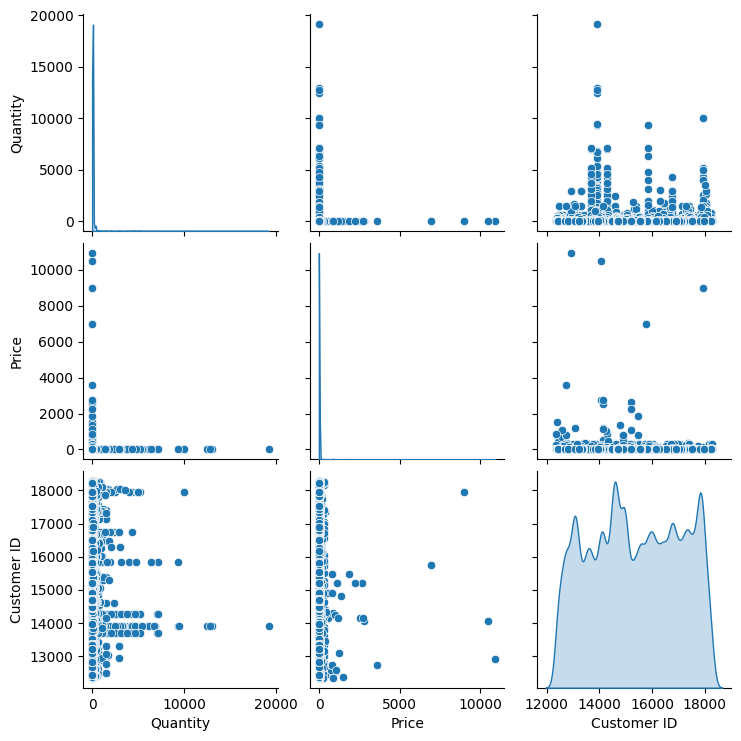

In [23]:
# Criar o pairplot com seaborn
sns.pairplot(filtered_data, diag_kind='kde', palette='Set2')
plt.show()

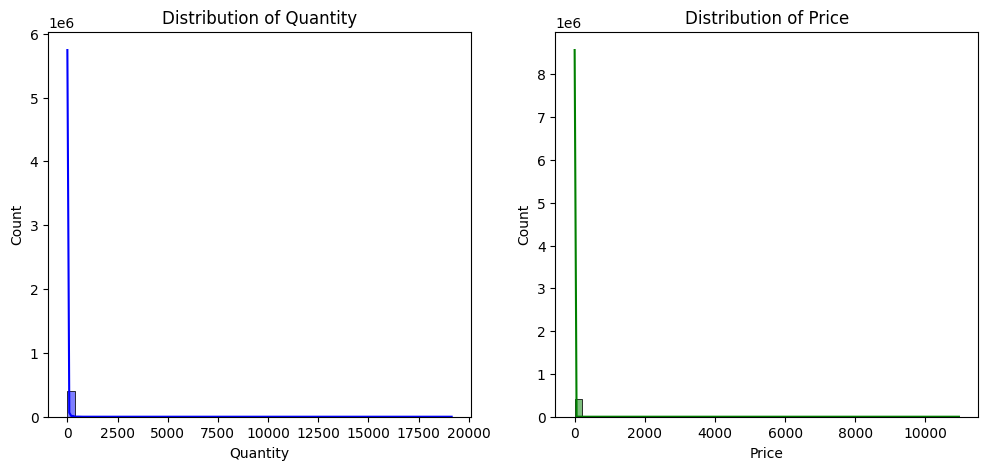

In [24]:
## 2. Histograms - Distribution of Quantity and Price
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(filtered_data["Quantity"], bins=50, kde=True, color='blue')
plt.title("Distribution of Quantity")

plt.subplot(1, 2, 2)
sns.histplot(filtered_data["Price"], bins=50, kde=True, color='green')
plt.title("Distribution of Price")
plt.show()

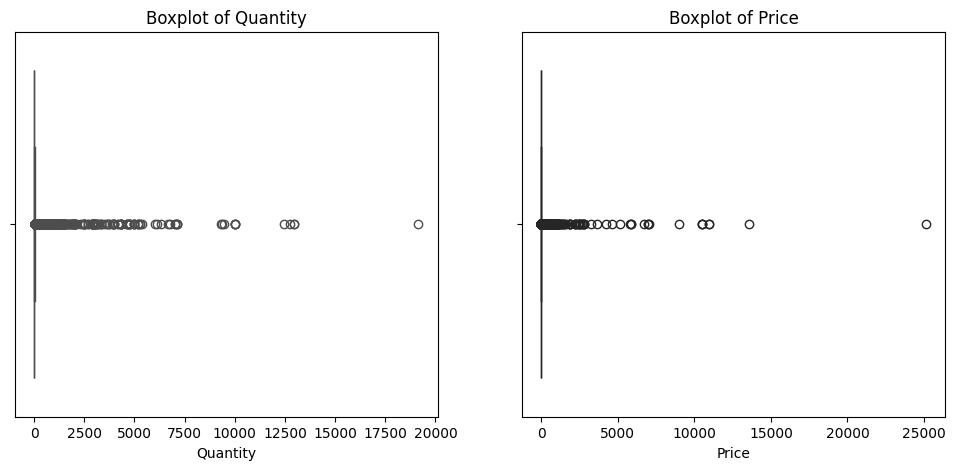

In [14]:
## 3. Boxplots - Detecting Outliers
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=filtered_data["Quantity"], color='blue')
plt.title("Boxplot of Quantity")

plt.subplot(1, 2, 2)
sns.boxplot(x=filtered_data["Price"], color='green')
plt.title("Boxplot of Price")
plt.show()

/var/folders/vw/w4z357v90f599jyt6ljmc29w0000gn/T/ipykernel_19472/3090987890.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="Blues_r")


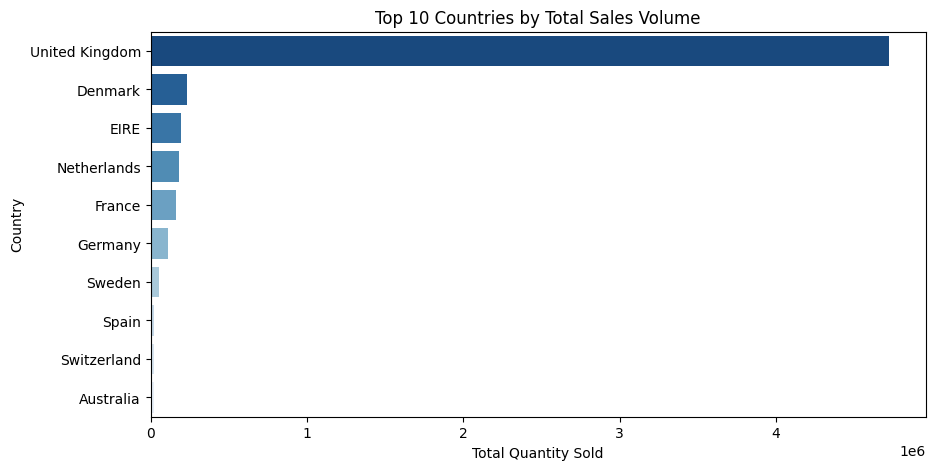

In [15]:
## 4. Top 10 Countries by Total Sales Volume
top_countries = filtered_data.groupby("Country")["Quantity"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="Blues_r")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Country")
plt.title("Top 10 Countries by Total Sales Volume")
plt.show()

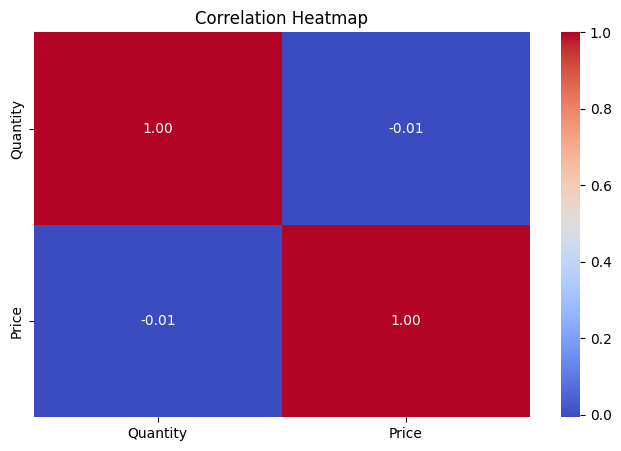

In [25]:
## 5. Correlation Analysis - Heatmap
corr_matrix = filtered_data[["Quantity", "Price"]].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

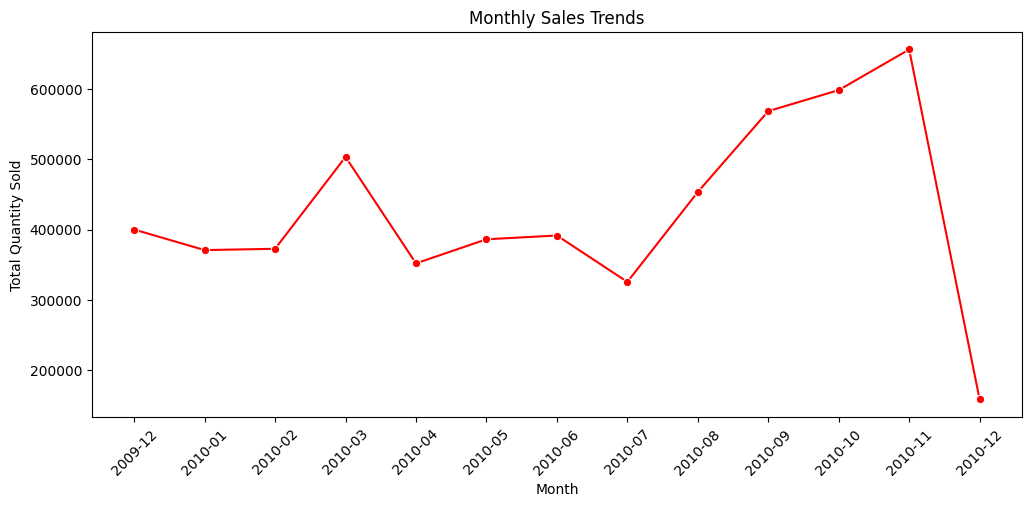

In [26]:
## 6. Monthly Sales Trends
filtered_data["Month"] = filtered_data["InvoiceDate"].dt.to_period("M")
monthly_sales = filtered_data.groupby("Month")["Quantity"].sum()

plt.figure(figsize=(12, 5))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker="o", color="red")
plt.xticks(rotation=45)
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Quantity Sold")
plt.show()

/var/folders/vw/w4z357v90f599jyt6ljmc29w0000gn/T/ipykernel_19472/3378816143.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="Greens_r")


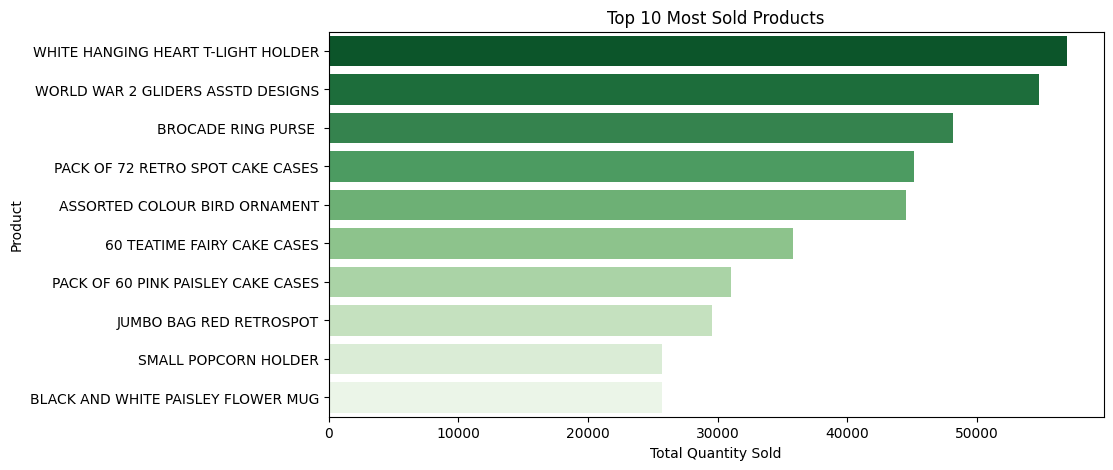

In [27]:
## 7. Most Sold Products
top_products = filtered_data.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette="Greens_r")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product")
plt.title("Top 10 Most Sold Products")
plt.show()

In [28]:
## 8. Customer Insights - Unique Customers and Average Purchase Quantity
unique_customers = filtered_data["Customer ID"].nunique()
avg_purchase_per_customer = filtered_data.groupby("Customer ID")["Quantity"].sum().mean()

print(f"Total Unique Customers: {unique_customers}")
print(f"Average Purchase Quantity per Customer: {avg_purchase_per_customer:.2f}")

Total Unique Customers: 4312
Average Purchase Quantity per Customer: 1284.40


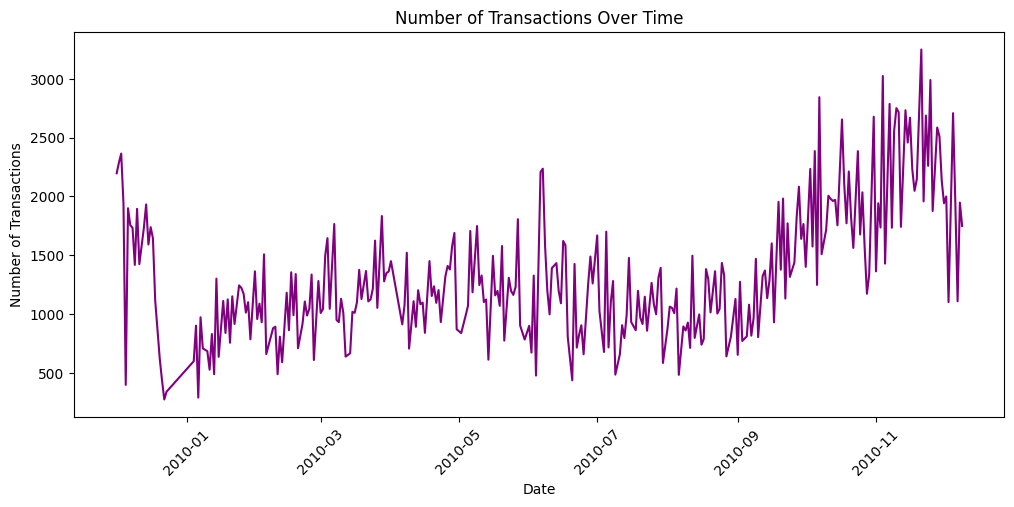

In [29]:
## 9. Invoice Analysis - Transactions Over Time
daily_transactions = filtered_data.groupby(filtered_data["InvoiceDate"].dt.date)["InvoiceDate"].count()

plt.figure(figsize=(12, 5))
sns.lineplot(x=daily_transactions.index, y=daily_transactions.values, color="purple")
plt.xticks(rotation=45)
plt.title("Number of Transactions Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.show()

## Filtrar colunas relevantes p/ ANOVA

In [9]:
# Selecionar as colunas relevantes, incluindo "Country" para ANOVA
selected_cols = ["Quantity", "Price", "Country"]
filtered_data = retail_data[selected_cols]

In [10]:
# Filtrar valores inconsistentes (excluir quantidades e preÃ§os negativos ou zero)
filtered_data = filtered_data[(filtered_data["Quantity"] > 0) & (filtered_data["Price"] > 0)]

## ANOVA

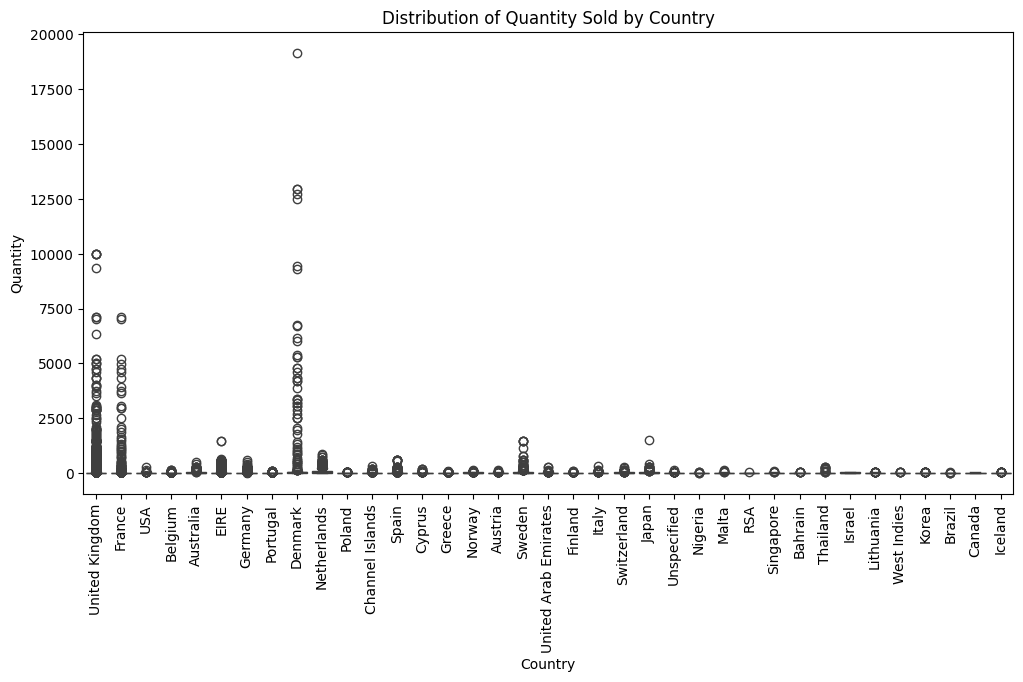

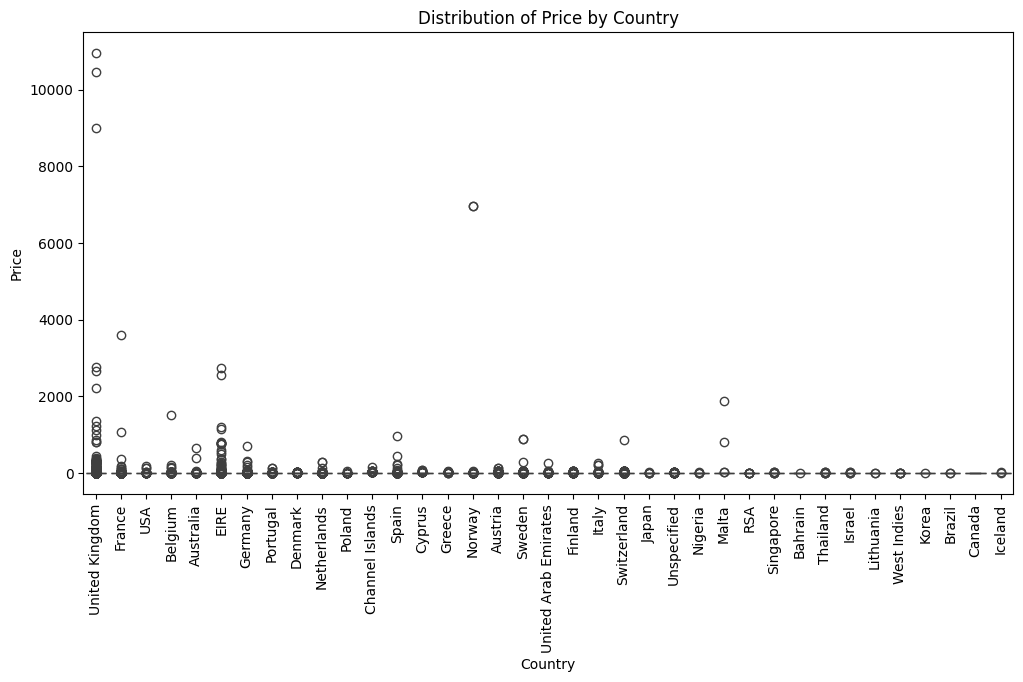

In [9]:
# Ensure relevant columns are selected
anova_data = retail_data[["Country", "Quantity", "Price"]].dropna()

# Filter out negative or zero values
anova_data = anova_data[(anova_data["Quantity"] > 0) & (anova_data["Price"] > 0)]

# Boxplot for Quantity by Country
plt.figure(figsize=(12, 6))
sns.boxplot(x="Country", y="Quantity", data=anova_data)
plt.xticks(rotation=90)  # Rotate country names for better readability
plt.title("Distribution of Quantity Sold by Country")
plt.show()

# Boxplot for Price by Country
plt.figure(figsize=(12, 6))
sns.boxplot(x="Country", y="Price", data=anova_data)
plt.xticks(rotation=90)
plt.title("Distribution of Price by Country")
plt.show()

In [10]:
# Shapiro-Wilk Test for Normality (only done for a subset, as itâ€™s sensitive to large datasets)
from scipy.stats import shapiro

for col in ["Quantity", "Price"]:
    stat, p = shapiro(anova_data[col].sample(500, random_state=42))  # Sample to avoid large dataset issues
    print(f"Shapiro-Wilk Test for {col}: W={stat:.4f}, P-value={p:.4f}")

Shapiro-Wilk Test for Quantity: W=0.3410, P-value=0.0000
Shapiro-Wilk Test for Price: W=0.6335, P-value=0.0000


In [13]:
import scipy.stats as stats

# Ensure relevant columns are selected
anova_data = retail_data[["Country", "Quantity", "Price"]].dropna()

# Filter out negative or zero values
anova_data = anova_data[(anova_data["Quantity"] > 0) & (anova_data["Price"] > 0)]

# Define groups again before performing Levene's test
quantity_groups = [group["Quantity"].values for _, group in anova_data.groupby("Country")]
price_groups = [group["Price"].values for _, group in anova_data.groupby("Country")]

# Perform Levene's Test for Homogeneity of Variances
stat_q, p_q = stats.levene(*quantity_groups)
stat_p, p_p = stats.levene(*price_groups)

print(f"Leveneâ€™s Test for Quantity: W={stat_q:.4f}, P-value={p_q:.4f}")
print(f"Leveneâ€™s Test for Price: W={stat_p:.4f}, P-value={p_p:.4f}")

Leveneâ€™s Test for Quantity: W=390.2831, P-value=0.0000
Leveneâ€™s Test for Price: W=15.0103, P-value=0.0000


In [14]:
# Perform ANOVA for Quantity
quantity_groups = [group["Quantity"].values for _, group in anova_data.groupby("Country")]
f_stat_quantity, p_value_quantity = stats.f_oneway(*quantity_groups)

# Perform ANOVA for Price
price_groups = [group["Price"].values for _, group in anova_data.groupby("Country")]
f_stat_price, p_value_price = stats.f_oneway(*price_groups)

# Display Results
print("\nðŸ”¹ **ANOVA for Quantity Sold**")
print(f"F-Statistic: {f_stat_quantity:.2f}, P-Value: {p_value_quantity:.4f}")

print("\nðŸ”¹ **ANOVA for Product Price**")
print(f"F-Statistic: {f_stat_price:.2f}, P-Value: {p_value_price:.4f}")


ðŸ”¹ **ANOVA for Quantity Sold**
F-Statistic: 408.84, P-Value: 0.0000

ðŸ”¹ **ANOVA for Product Price**
F-Statistic: 14.80, P-Value: 0.0000


In [17]:
from scipy.stats import kruskal, f_oneway

# Teste de Kruskal-Wallis (alternativa nÃ£o paramÃ©trica Ã  ANOVA)
kw_quantity = kruskal(*[group["Quantity"].values for _, group in anova_data.groupby("Country")])
kw_price = kruskal(*[group["Price"].values for _, group in anova_data.groupby("Country")])

print("\nðŸ”¹ **Kruskal-Wallis Test for Non-Normal Data**")
print(f"Quantity - H: {kw_quantity.statistic:.2f}, P-Value: {kw_quantity.pvalue:.4f}")
print(f"Price - H: {kw_price.statistic:.2f}, P-Value: {kw_price.pvalue:.4f}")

# ANOVA de Welch (corrige para variÃ¢ncias desiguais)
from scipy.stats import ttest_ind

# Criar grupos de paÃ­ses para o teste de Welch
quantity_groups = [group["Quantity"].values for _, group in anova_data.groupby("Country")]
price_groups = [group["Price"].values for _, group in anova_data.groupby("Country")]

import pingouin as pg  # Certifique-se de instalar com `pip install pingouin`

# Welchâ€™s ANOVA para Quantity e Price
welch_quantity = pg.welch_anova(dv="Quantity", between="Country", data=anova_data)
welch_price = pg.welch_anova(dv="Price", between="Country", data=anova_data)

print("\nðŸ”¹ **Welchâ€™s ANOVA for Unequal Variances**")
print(f"Quantity - F: {welch_quantity['F'][0]:.2f}, P-Value: {welch_quantity['p-unc'][0]:.4f}")
print(f"Price - F: {welch_price['F'][0]:.2f}, P-Value: {welch_price['p-unc'][0]:.4f}")


ðŸ”¹ **Kruskal-Wallis Test for Non-Normal Data**
Quantity - H: 14977.50, P-Value: 0.0000
Price - H: 924.60, P-Value: 0.0000

ðŸ”¹ **Welchâ€™s ANOVA for Unequal Variances**
Quantity - F: 64.48, P-Value: 0.0000
Price - F: 11.53, P-Value: 0.0000
